In [1]:
import datetime
import calendar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 30
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('dataset.csv', sep=';')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df['Price'] = df['Quantity'] * df['UnitPrice']

## Pays

In [6]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
df = df[df.Country == "United Kingdom"]
df.drop(['Country'], axis=1, inplace=True)

## Date

In [8]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M'))

In [9]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [10]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

## Valeurs manquantes

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Price               0
dtype: int64

In [12]:
df = df[~df.CustomerID.isnull()]
df.shape

(361878, 8)

## Suppression doublons

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(356728, 8)

## Description

In [14]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Price
count,356728,356728,356728,356728.000000,356728,356728.000000,356728.000000,356728.000000
unique,19857,3661,3860,NaN,18441,NaN,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,NaN
freq,542,1976,1969,NaN,543,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:49:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,11.198644,NaN,3.268255,15543.795284,18.914008
std,NaN,NaN,NaN,264.998044,NaN,71.162330,1594.286219,455.157029
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,-168469.600000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,14191.000000,3.900000


## StockCode : valeurs aberrantes

In [15]:
# StockCode
list(df.StockCode.sort_values(ascending=False).unique())

['POST',
 'PADS',
 'M',
 'DOT',
 'D',
 'CRUK',
 'C2',
 'BANK CHARGES',
 '90214Z',
 '90214Y',
 '90214W',
 '90214V',
 '90214U',
 '90214T',
 '90214S',
 '90214R',
 '90214P',
 '90214O',
 '90214N',
 '90214M',
 '90214L',
 '90214K',
 '90214J',
 '90214I',
 '90214H',
 '90214G',
 '90214F',
 '90214E',
 '90214D',
 '90214C',
 '90214B',
 '90214A',
 '90212C',
 '90212B',
 '90211B',
 '90211A',
 '90210D',
 '90210C',
 '90210B',
 '90210A',
 '90209C',
 '90209B',
 '90209A',
 '90208',
 '90206C',
 '90206A',
 '90205C',
 '90205A',
 '90204',
 '90202C',
 '90202B',
 '90201D',
 '90201C',
 '90201B',
 '90201A',
 '90200E',
 '90200D',
 '90200C',
 '90200B',
 '90200A',
 '90199D',
 '90199C',
 '90199B',
 '90199A',
 '90198B',
 '90198A',
 '90197B',
 '90196B',
 '90196A',
 '90195B',
 '90195A',
 '90194',
 '90192',
 '90191',
 '90190C',
 '90190B',
 '90190A',
 '90189A',
 '90188',
 '90187B',
 '90186B',
 '90186A',
 '90185D',
 '90185C',
 '90185B',
 '90185A',
 '90184C',
 '90184B',
 '90184A',
 '90183C',
 '90183A',
 '90181A',
 '90180B',


In [16]:
df = df[~np.isin(df.StockCode, ['POST', 'DOT', 'CRUK', 'BANK CHARGES', 'C2', 'M'])]
df.shape

(356188, 8)

## Traitement des outliers

In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID,Price
count,356188.000000,356188.000000,356188.000000,356188.000000
mean,11.205903,2.910924,15543.809084,19.084070
std,265.156364,5.579790,1594.191367,449.919867
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,14191.000000,3.900000
50%,4.000000,1.950000,15513.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,1867.860000,18287.000000,168469.600000


In [18]:
df[np.abs(df.Quantity) > 5000].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,77183.6
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,0.0
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,-280.8
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,-77183.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,-168469.6


In [19]:
df = df[np.abs(df.Quantity) <= 50000]
df.reset_index(drop=True, inplace=True)
df.shape

(356184, 8)

## Quantité négative

In [20]:
df[(df.Quantity < 0)].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Price
307477,C576324,22141,CHRISTMAS CRAFT TREE TOP ANGEL,-1,2011-11-14 15:10:00,2.10,16161.0,-2.10
208984,C566007,21790,VINTAGE SNAP CARDS,-48,2011-09-08 12:03:00,0.85,16076.0,-40.80
296112,C575155,90176A,CLASSIC DIAMANTE NECKLACE JET,-1,2011-11-08 16:17:00,7.50,13709.0,-7.50
17232,C538705,21658,GLASS BEURRE DISH,-1,2010-12-14 10:33:00,3.95,15093.0,-3.95
187159,C562952,23110,PARISIENNE KEY CABINET,-1,2011-08-11 10:10:00,5.75,12749.0,-5.75
164721,C559983,22916,HERB MARKER THYME,-12,2011-07-14 11:41:00,0.65,14562.0,-7.80
55570,C544665,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,2011-02-22 14:56:00,2.95,12852.0,-2.95
253505,C570647,23343,JUMBO BAG VINTAGE CHRISTMAS,-100,2011-10-11 13:09:00,1.79,15125.0,-179.00
329497,C578673,22946,WOODEN ADVENT CALENDAR CREAM,-1,2011-11-24 18:05:00,16.95,16016.0,-16.95
73255,C546997,22710,WRAP I LOVE LONDON,-25,2011-03-18 13:32:00,0.42,12748.0,-10.50


In [30]:
stock_code = '22710'
quantity = -25
customer_id = 12748

df[(df.StockCode == stock_code) & (df.Quantity >= -quantity) & (df.CustomerID == customer_id)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Price
73113,546991,22710,WRAP I LOVE LONDON,25,2011-03-18 13:08:00,0.42,12748.0,10.5
234403,568703,22710,WRAP I LOVE LONDON,25,2011-09-28 15:21:00,0.42,12748.0,10.5


In [20]:
df['Cancelled'] = df['InvoiceNo'].str.startswith('C')

## Nombre de produits

In [21]:
len(df['StockCode'].unique())

3654

## Panier moyen

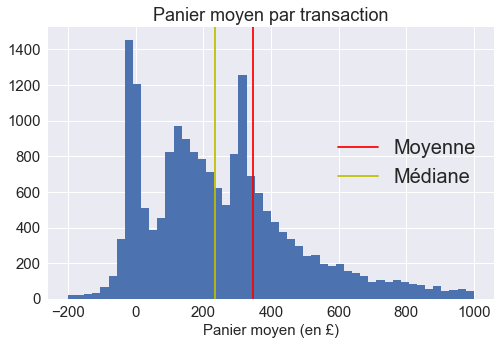

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))

mean_invoice = df.groupby('InvoiceNo')['Price'].sum()

ax.hist(mean_invoice, bins=50, range=(-200, 1000))
line1 = ax.axvline(x=mean_invoice.mean(), color='r')
line2 = ax.axvline(x=mean_invoice.median(), color='y')
ax.set_title("Panier moyen par transaction", size=18)
ax.set_xlabel("Panier moyen (en £)", size=15)
ax.tick_params(labelsize=15)

ax.legend(handles=(line1, line2), labels=('Moyenne', 'Médiane'), fontsize=20, loc='center right')
plt.show()

In [23]:
mean_invoice.mean()

346.08811175602057

In [24]:
mean_invoice.median()

233.67000000000004

## Saisonnalité des revenus

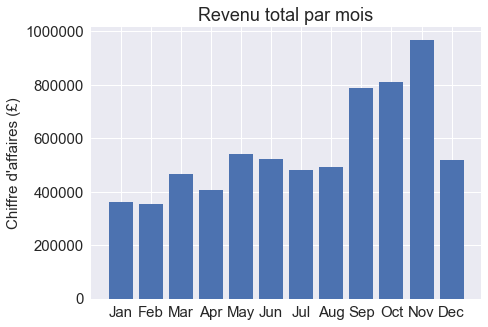

In [51]:
temp = df[(~df.Cancelled) & (df.InvoiceDate >= datetime.datetime(2010, 12, 10))].copy()
temp['month'] = temp['InvoiceDate'].apply(lambda x: x.month)

revenues = temp.groupby('month')['Price'].sum()

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x=np.arange(len(revenues)), 
       height=revenues,
       tick_label=[calendar.month_abbr[x] for x in revenues.index])
ax.set_title("Revenu total par mois", size=18)
ax.set_ylabel("Chiffre d'affaires (£)", size=15)
ax.tick_params(labelsize=15)

plt.show()

## Customers table

In [35]:
def first(x): return (datetime.datetime(2011, 12, 10) - x.min()).days
def last(x): return (datetime.datetime(2011, 12, 10) - x.max()).days
def unique(x): return len(x.unique())
def cancel_rate(x): return x.sum() / (len(x)-x.sum())

# Ajout de la récence, du nb de jours depuis la 1e transaction et du nombre de transactions
temp = df[~df.Cancelled]
customers = temp.groupby('CustomerID').agg({
    'InvoiceDate': [last, first],
    'InvoiceNo': unique,
})
customers.columns = ['_'.join(x) for x in customers.columns.ravel()]
customers.rename(columns={'InvoiceDate_last': 'recency', 'InvoiceDate_first': 'client_since',
                          'InvoiceNo_unique': 'frequency'}, inplace=True)

# Ajout de la quantité moyenne commandée, du revenu généré par le client et du taux d'annulation des commandes
temp = df.groupby('CustomerID').agg({
    'Quantity': 'mean',
    'Price': lambda x: x.sum(),
    'Cancelled': cancel_rate,
})
customers = pd.merge(customers, temp, left_index=True, right_index=True)
customers.rename(columns={'Quantity': 'quantity_mean', 'Price': 'monetary_value', 
                          'Cancelled': 'cancel_rate'}, inplace=True)

"""
# Tests effectués avec d'autres aggrégats, mais le clustering était moins efficace donc pas conservés
temp2 = temp.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Price': lambda x: x.sum(),
})
customers_transactions = temp2.groupby('CustomerID').agg({'Price': 'mean'})
#customers_transactions.columns = ['_'.join(x) for x in customers_transactions.columns.ravel()]
customers = pd.merge(customers, customers_transactions, left_index=True, right_index=True)
customers.rename(columns={'Price': 'invoice_mean'}, inplace=True)


temp2 = temp.groupby(['CustomerID', 'StockCode']).agg({
    'UnitPrice': 'mean',
})
customers_transactions = temp2.groupby('CustomerID').agg({'UnitPrice': 'mean'})
#customers_transactions.columns = ['_'.join(x) for x in customers_transactions.columns.ravel()]
customers = pd.merge(customers, customers_transactions, left_index=True, right_index=True)
customers.rename(columns={'UnitPrice': 'mean_unit_price'}, inplace=True)
"""

customers = customers[(customers.monetary_value >= 1)]

c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.


In [36]:
customers

,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate
CustomerID,,,,,,
12747.0,2,369,11,12.378641,4196.01,0.000000
12748.0,0,373,206,5.296396,29819.99,0.009779
12749.0,3,213,5,6.178261,3818.20,0.161616
12820.0,3,326,4,12.237288,942.34,0.000000
12821.0,214,214,1,11.666667,92.72,0.000000
12822.0,70,87,2,11.659574,918.98,0.021739
12823.0,74,296,5,46.000000,1759.50,0.000000
12824.0,59,59,1,9.280000,397.12,0.000000
12826.0,2,365,7,11.212766,1468.12,0.032967


In [37]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,3905.0,91.728553,99.632360,0.000000,17.00000,50.000000,143.000000,373.0
client_since,3905.0,223.219206,117.994046,1.000000,112.00000,249.000000,327.000000,373.0
frequency,3905.0,4.242254,7.163468,1.000000,1.00000,2.000000,5.000000,206.0
quantity_mean,3905.0,20.538714,105.156291,0.090909,5.34717,9.433962,14.129032,4300.0
monetary_value,3905.0,1741.726518,6666.362695,2.900000,290.82000,632.400000,1529.810000,259657.3
cancel_rate,3905.0,0.027179,0.112257,0.000000,0.00000,0.000000,0.017347,5.0


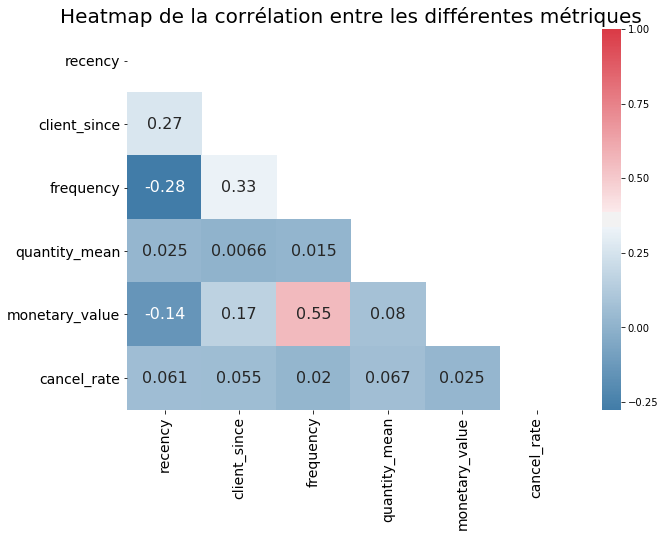

In [38]:
corr = customers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size": 16})
ax.set_title("Heatmap de la corrélation entre les différentes métriques", size=20)
ax.tick_params(labelsize=14)

plt.show()

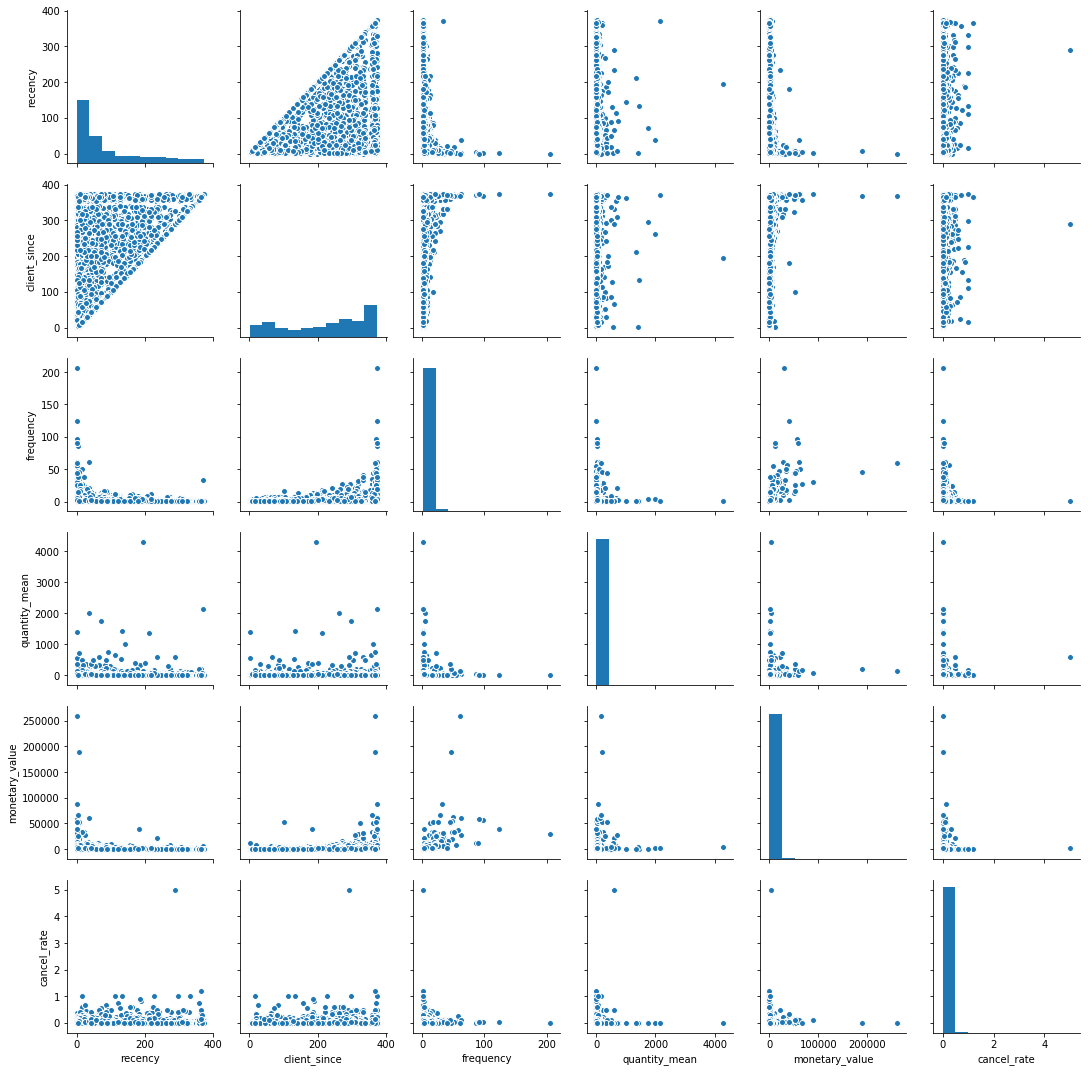

In [39]:
# Pair plot des différents métriques
sns.pairplot(customers)
plt.show()

## Transformation log

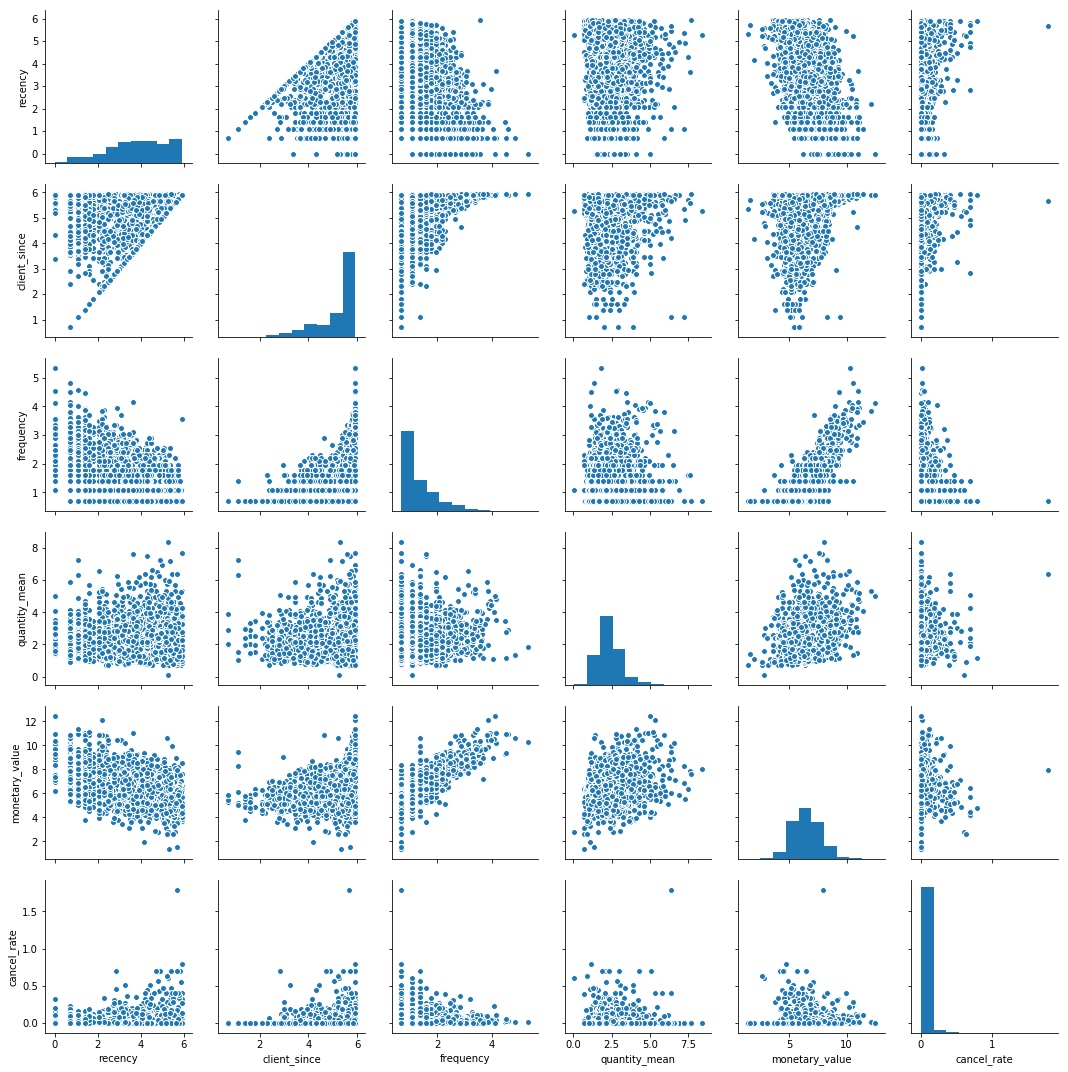

In [40]:
customers_log = customers.apply(lambda x: np.log(x+1))
sns.pairplot(customers_log)
plt.show()

## Standardisation

In [41]:
std_scaler = StandardScaler().fit(customers_log)
customers_std = std_scaler.transform(customers_log)

## PCA

In [42]:
pca = PCA(n_components=3).fit(customers_std)
customers_pca = pca.transform(customers_std)

## KMeans

For n_clusters = 2 The average silhouette_score is : 0.34003221200533373


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,17,313,6,10.507246,2002.355,0.009174,1458,37.336748
1,88,187,1,8.750000,344.140,0.000000,2447,62.663252


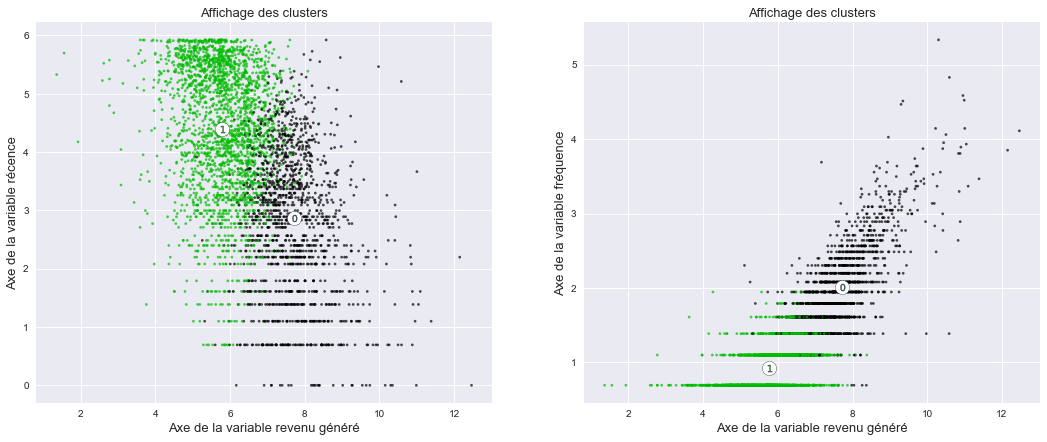

For n_clusters = 3 The average silhouette_score is : 0.3399234062910455


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,169,264,2,8.384615,369.20,0.000000,1651,42.279129
1,31,51,1,9.777778,343.50,0.000000,903,23.124200
2,17,316,6,10.576023,2114.68,0.009524,1351,34.596671


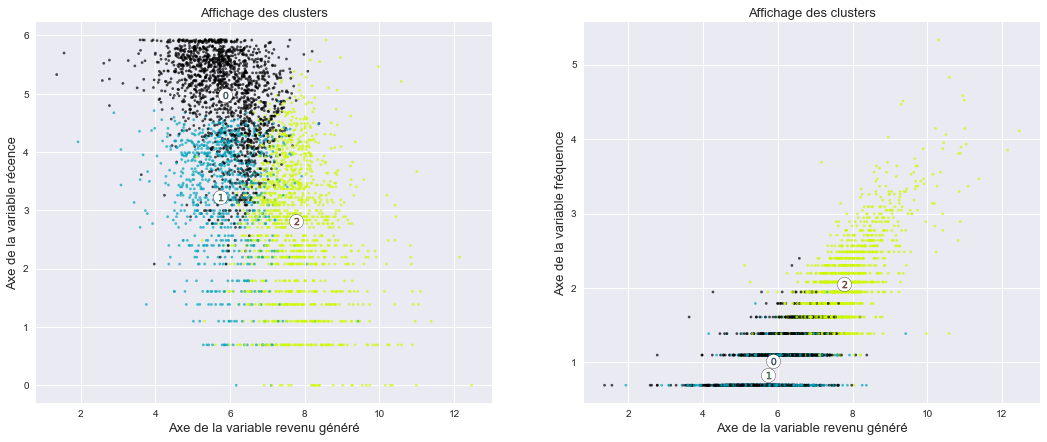

For n_clusters = 4 The average silhouette_score is : 0.3501270226506771


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,31,50,1,9.666667,335.00,0.000000,854,21.869398
1,16,317,6,10.404580,2128.83,0.009434,1295,33.162612
2,166,263,2,7.928571,365.27,0.000000,1511,38.693982
3,127,260,2,41.545455,601.56,0.100000,245,6.274008


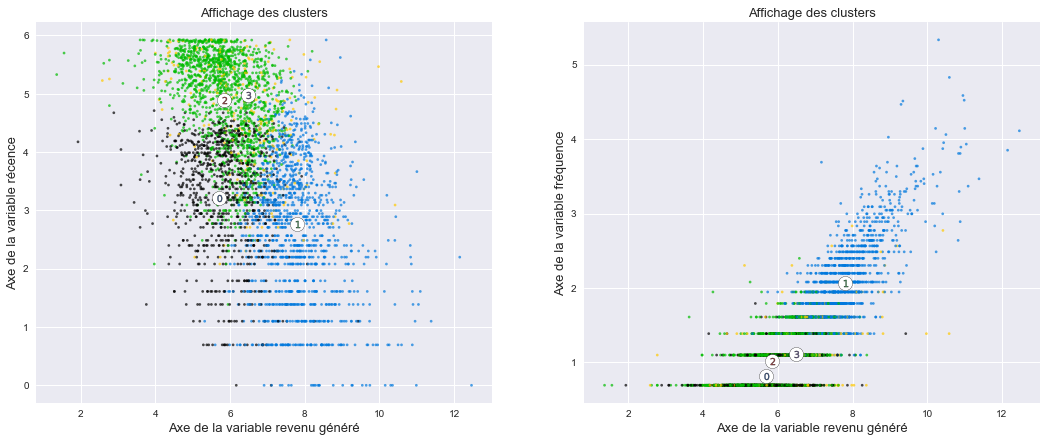

For n_clusters = 5 The average silhouette_score is : 0.3197070551955805


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,211.0,259.0,1.0,7.592593,286.79,0.000000,1093,27.989757
1,7.0,358.0,11.0,11.563245,3878.31,0.013333,558,14.289373
2,33.0,281.0,4.0,9.333333,1125.07,0.000000,1209,30.960307
3,32.0,47.0,1.0,9.537313,329.34,0.000000,817,20.921895
4,130.5,260.5,2.0,43.927083,601.04,0.109127,228,5.838668


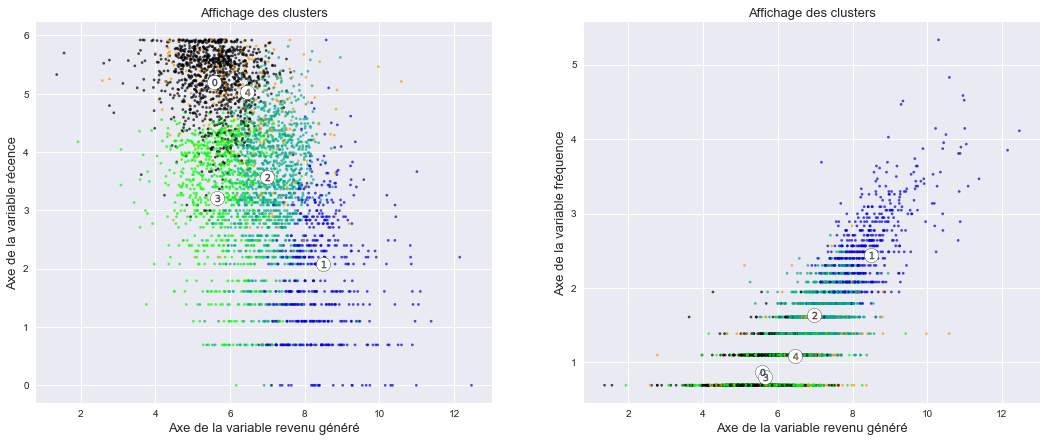

For n_clusters = 6 The average silhouette_score is : 0.2829060918129512


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,15,301,6,9.965517,2067.130,0.007273,789,20.204866
1,234,256,1,7.339713,236.925,0.000000,898,22.996159
2,130,260,2,47.200000,601.560,0.100000,225,5.761844
3,4,365,17,14.185567,6729.290,0.019481,243,6.222791
4,32,46,1,9.666667,326.750,0.000000,795,20.358515
5,58,273,3,8.908537,781.910,0.000000,955,24.455826


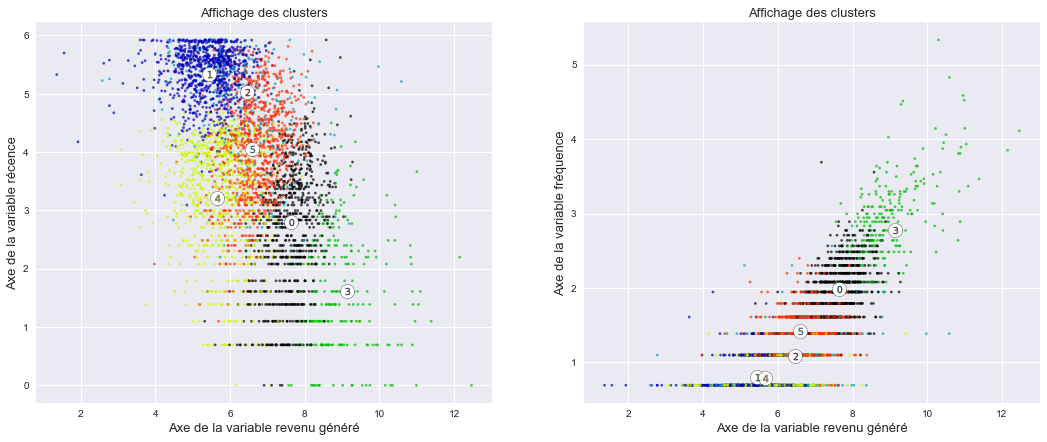

For n_clusters = 7 The average silhouette_score is : 0.27019740924812985


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,60.0,282.0,3.0,8.876068,813.295,0.000000,896,22.944942
1,243.0,264.0,1.0,7.076923,236.040,0.000000,815,20.870679
2,53.0,70.0,1.0,9.750000,330.030,0.000000,643,16.466069
3,15.0,23.0,1.0,9.204412,316.375,0.000000,306,7.836108
4,15.0,297.0,6.0,9.920580,2069.050,0.007737,786,20.128041
5,4.0,365.0,17.0,14.428571,6841.240,0.019737,237,6.069142
6,130.5,260.5,2.0,48.133333,594.000,0.100000,222,5.685019


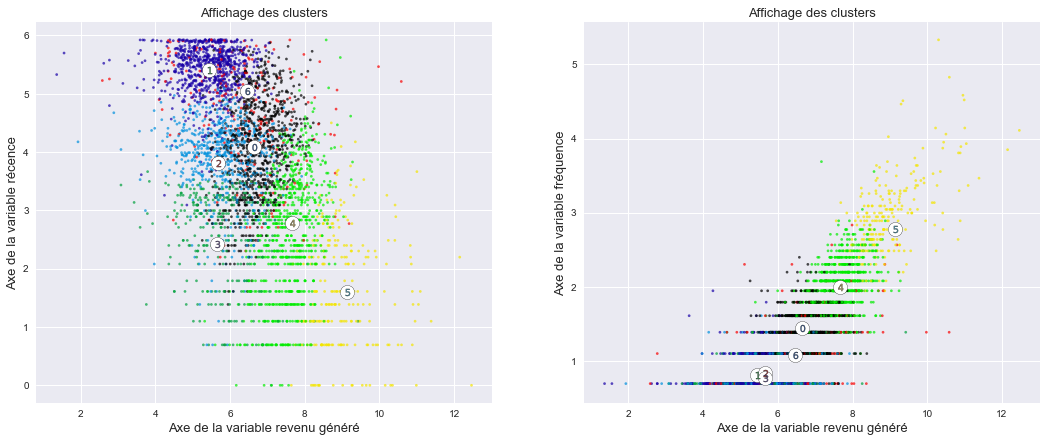

For n_clusters = 8 The average silhouette_score is : 0.2791592971619602


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,65.0,284.0,3.0,8.979167,783.020,0.000000,861,22.048656
1,61.0,70.0,1.0,10.125000,303.160,0.000000,557,14.263764
2,17.0,320.0,7.0,9.847411,2203.340,0.008412,704,18.028169
3,247.0,266.0,1.0,7.028571,236.020,0.000000,793,20.307298
4,10.0,86.0,3.0,10.090909,891.210,0.000000,319,8.169014
5,3.5,366.0,18.0,14.653337,7172.775,0.022449,218,5.582586
6,133.0,260.5,2.0,48.604545,601.040,0.134848,188,4.814341
7,17.0,21.0,1.0,8.255814,270.900,0.000000,265,6.786172


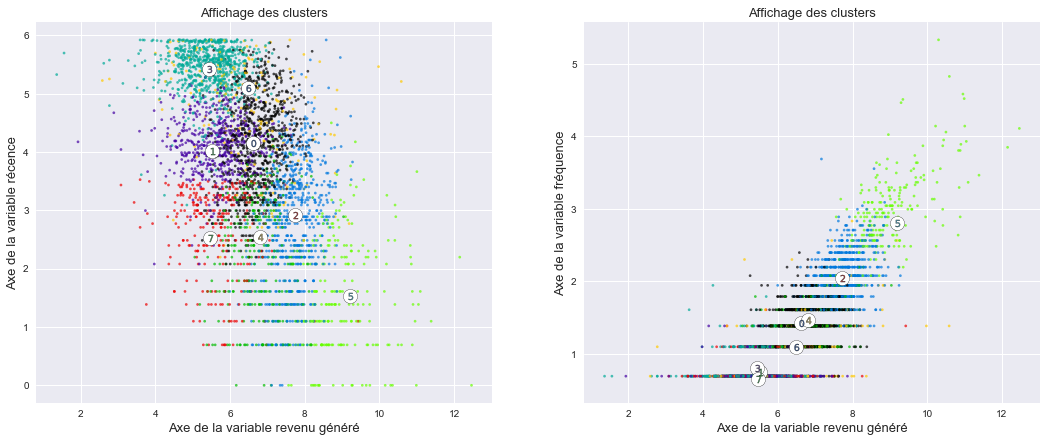

For n_clusters = 9 The average silhouette_score is : 0.28302899323331265


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size,size_pct
cluster,,,,,,,,
0,61,67,1,9.812500,298.210,0.000000,541,13.854033
1,17,320,7,9.784314,2183.040,0.008439,705,18.053777
2,4,366,17,14.682990,6945.020,0.021499,229,5.864277
3,64,282,3,8.754762,774.585,0.000000,828,21.203585
4,17,19,1,8.507042,271.190,0.000000,259,6.632522
5,246,266,1,6.952381,233.450,0.000000,771,19.743918
6,196,288,1,27.142857,360.000,0.666667,25,0.640205
7,10,82,3,10.243097,902.215,0.000000,300,7.682458
8,113,254,2,40.272727,611.880,0.060606,247,6.325224


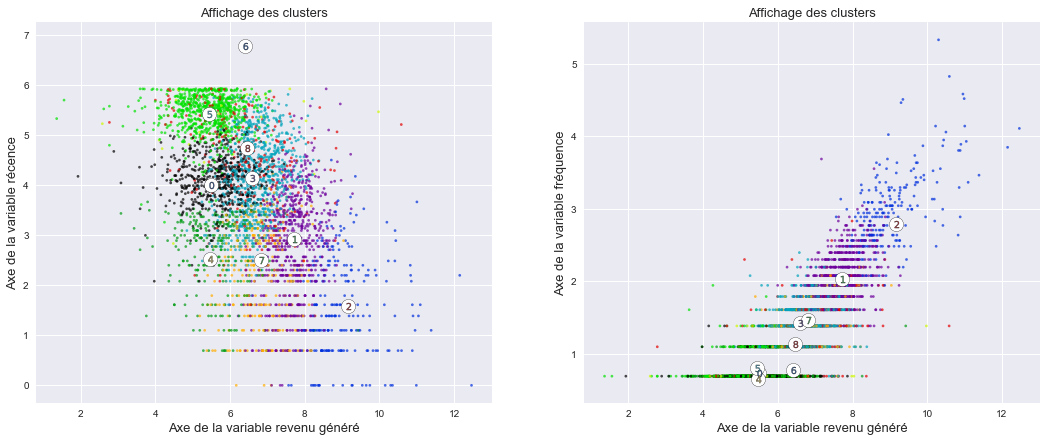

,nb_clusters,silhouette_score
0,2,0.340032
1,3,0.339923
2,4,0.350127
3,5,0.319707
4,6,0.282906
5,7,0.270197
6,8,0.279159
7,9,0.283029


In [76]:
silhouette_scores = []

for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Clustering avec KMeans, random_state fixé pour la reproductibilité
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(customers_pca)

    # Calcul du coefficient de silhouette
    # qui donne une idée de la qualité du clustering
    silhouette_avg = silhouette_score(customers_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_scores.append((n_clusters, silhouette_avg))
    
    # Afficher les valeurs médianes pour chaque cluster
    temp = customers.copy()
    temp['cluster'] = cluster_labels
    cluster_median = temp.groupby('cluster').agg('median')
    cluster_median['cluster_size'] = temp.groupby('cluster').size()
    cluster_median['size_pct'] = cluster_median['cluster_size'] / 3905 * 100    
    display(cluster_median)

    centers = pca.inverse_transform(clusterer.cluster_centers_)
    
    # Affichage des clusters selon la récence et le revenu généré
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax1.scatter(customers_log.loc[:, 'monetary_value'], 
                customers_log.loc[:, 'recency'], 
                marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Dessine le centre des clusters
    ax1.scatter(std_scaler.inverse_transform(centers)[:, -2], 
                std_scaler.inverse_transform(centers)[:, 0], 
                marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax1.scatter(std_scaler.inverse_transform(c)[-2], 
                    std_scaler.inverse_transform(c)[0], 
                    marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax1.set_title("Affichage des clusters", size=13)
    ax1.set_xlabel("Axe de la variable revenu généré", size=13)
    ax1.set_ylabel("Axe de la variable récence", size=13)

    # Affichage des clusters selon la fréquence et le revenu généré
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(customers_log.loc[:, 'monetary_value'], 
                customers_log.loc[:, 'frequency'], 
                marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Dessine le centre des clusters
    ax2.scatter(std_scaler.inverse_transform(centers)[:, -2], 
                std_scaler.inverse_transform(centers)[:, 2], 
                marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(std_scaler.inverse_transform(c)[-2], 
                    std_scaler.inverse_transform(c)[2], 
                    marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Affichage des clusters", size=13)
    ax2.set_xlabel("Axe de la variable revenu généré", size=13)
    ax2.set_ylabel("Axe de la variable fréquence", size=13)

    plt.show()
    
pd.DataFrame(silhouette_scores, columns=['nb_clusters', 'silhouette_score'])

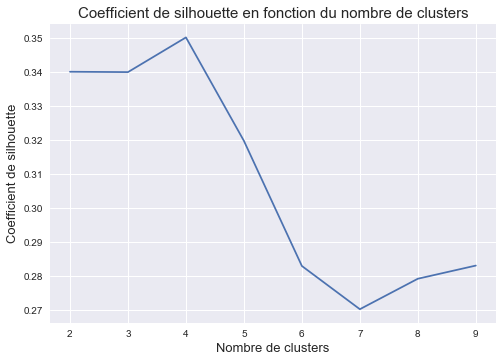

In [73]:
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores])
plt.title("Coefficient de silhouette en fonction du nombre de clusters", size=15)
plt.xlabel("Nombre de clusters", size=13)
plt.ylabel("Coefficient de silhouette", size=13)

plt.show()

## Train/Test split et export des tables clients

In [44]:
X_tr, X_ts = train_test_split(customers)

X_tr_log = X_tr.apply(lambda x: np.log(x+1))
X_ts_log = X_ts.apply(lambda x: np.log(x+1))

std_scaler = StandardScaler().fit(X_tr_log)
X_tr_std = std_scaler.transform(X_tr_log)
X_ts_std = std_scaler.transform(X_ts_log)

pca = PCA(n_components=3).fit(X_tr_std)
X_tr_pca = pca.transform(X_tr_std)
X_ts_pca = pca.transform(X_ts_std)

clusterer = KMeans(n_clusters=5).fit(X_tr_pca)
train_labels = clusterer.predict(X_tr_pca)
test_labels = clusterer.predict(X_ts_pca)

train = X_tr.copy().reset_index()
train['cluster'] = train_labels
test = X_ts.copy().reset_index()
test['cluster'] = test_labels

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [45]:
# Export du jeu de données en entier
cluster_labels = KMeans(n_clusters=5).fit_predict(customers_pca)
temp = customers.copy().reset_index()
temp['cluster'] = cluster_labels
temp.to_csv('customers_full.csv', index=False)

## Stabilité du clustering

In [46]:
# Médianes des clusters sur tout le jeu de données
cluster_labels = KMeans(n_clusters=5).fit_predict(customers_pca)

temp = customers.copy()
temp['cluster'] = cluster_labels
cluster_median = temp.groupby('cluster').agg('median')
cluster_median['cluster_size'] = temp.groupby('cluster').size()
display(cluster_median)

,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size
cluster,,,,,,,
0,210.5,259.0,1.0,7.596296,286.265,0.000000,1094
1,33.0,281.0,4.0,9.333333,1125.070,0.000000,1209
2,7.0,358.0,11.0,11.563245,3878.310,0.013333,558
3,32.0,47.0,1.0,9.537313,329.340,0.000000,817
4,130.0,261.0,2.0,43.666667,601.560,0.111111,227


In [49]:
# Médianes des clusters après le split (sur le jeu d'entraînement seulement)
cluster_median = train.groupby('cluster').agg('median')
cluster_median['cluster_size'] = train.groupby('cluster').size()
display(cluster_median.iloc[:,1:])

,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size
cluster,,,,,,,
0,37,280,4,9.579832,1091.855,0.000000,886
1,133,252,2,42.647059,612.430,0.142857,153
2,8,354,10,11.625000,3559.210,0.013245,455
3,217,259,1,7.601724,266.125,0.000000,826
4,30,47,1,9.400000,329.295,0.000000,608


In [77]:
def first(x): return (datetime.datetime(2011, 9, 1) - x.min()).days
def last(x): return (datetime.datetime(2011, 9, 1) - x.max()).days
def unique(x): return len(x.unique())
def cancel_rate(x): return x.sum() / (len(x)-x.sum())

df_temp = df[df.InvoiceDate <= datetime.datetime(2011, 8, 31)]

# Ajout de la récence, du nb de jours depuis la 1e transaction et du nombre de transactions
temp = df_temp[~df_temp.Cancelled]
customers_temp = temp.groupby('CustomerID').agg({
    'InvoiceDate': [last, first],
    'InvoiceNo': unique,
})
customers_temp.columns = ['_'.join(x) for x in customers_temp.columns.ravel()]
customers_temp.rename(columns={'InvoiceDate_last': 'recency', 'InvoiceDate_first': 'client_since',
                          'InvoiceNo_unique': 'frequency'}, inplace=True)
# Ajout de la quantité moyenne commandée, du revenu total et du taux d'annulation des commandes
temp = df_temp.groupby('CustomerID').agg({
    'Quantity': 'mean',
    'Price': lambda x: x.sum(),
    'Cancelled': cancel_rate,
})
customers_temp = pd.merge(customers_temp, temp, left_index=True, right_index=True)
customers_temp.rename(columns={'Quantity': 'quantity_mean', 'Price': 'monetary_value', 
                          'Cancelled': 'cancel_rate'}, inplace=True)
customers_temp = customers_temp[(customers_temp.monetary_value >= 1) & (customers_temp.quantity_mean >= 0)]

customers_temp_log = customers_temp.apply(lambda x: np.log(x+1))
customers_temp_std = StandardScaler().fit_transform(customers_temp_log)
customers_temp_pca = PCA(n_components=3).fit_transform(customers_temp_std)
cluster_labels = KMeans(n_clusters=5).fit_predict(customers_temp_pca)
temp = customers_temp.copy()
temp['cluster'] = cluster_labels
cluster_median = temp.groupby('cluster').agg('median')
cluster_median['cluster_size'] = temp.groupby('cluster').size()
display(cluster_median)

c:\users\serphone\envs\ds_libs_tuto\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.


,recency,client_since,frequency,quantity_mean,monetary_value,cancel_rate,cluster_size
cluster,,,,,,,
0,29.0,37.0,1.0,10.422222,303.680,0.000000,342
1,125.0,176.0,1.0,15.000000,381.820,0.222222,145
2,13.0,260.5,9.0,11.979651,3242.470,0.012821,402
3,154.0,173.0,1.0,7.312500,251.210,0.000000,1161
4,49.0,211.0,3.0,9.313853,944.055,0.000000,920
